In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import seaborn as sns

In [57]:
mov_train=pd.read_csv("./DataSets/mov_train.csv")
mov_train.head()   

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,imdb_rating,numVotes
0,0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,5.0,39572.0
1,1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,5.8,82272.0
2,2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,8.5,852772.0
3,3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,8.1,63220.0
4,4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,5.7,316.0


In [59]:
actors=pd.read_csv("./DataSets/actors.csv")
actors.head()   

,Unnamed: 0,MoviesN,AvgPop,AvgIMDB,Score
0,Stan Lee,8,0.257924,0.762346,0.606930
1,Gino Corrado,6,0.027834,0.849794,0.574599
2,Joseph Oliveira,5,0.163211,0.861728,0.574432
3,Andy Serkis,10,0.117575,0.766667,0.571418
4,Philip Ettington,15,0.053379,0.772840,0.556998


In [60]:
mov_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3000 non-null   int64  
 1   id                     3000 non-null   int64  
 2   belongs_to_collection  604 non-null    object 
 3   budget                 3000 non-null   int64  
 4   genres                 2993 non-null   object 
 5   homepage               946 non-null    object 
 6   imdb_id                3000 non-null   object 
 7   original_language      3000 non-null   object 
 8   original_title         3000 non-null   object 
 9   overview               2992 non-null   object 
 10  popularity             3000 non-null   float64
 11  poster_path            2999 non-null   object 
 12  production_companies   2844 non-null   object 
 13  production_countries   2945 non-null   object 
 14  release_date           3000 non-null   object 
 15  runt

In [61]:
mov_train['Keywords']

0       [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1       [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2       [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3       [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                     NaN
                              ...                        
2995    [{'id': 378, 'name': 'prison'}, {'id': 572, 'n...
2996    [{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...
2997    [{'id': 441, 'name': 'assassination'}, {'id': ...
2998    [{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...
2999    [{'id': 591, 'name': 'cia'}, {'id': 822, 'name...
Name: Keywords, Length: 3000, dtype: object

In [62]:
mov_train.drop(columns = ['id', 'Unnamed: 0','belongs_to_collection','homepage','overview','poster_path','tagline'],inplace=True)

In [63]:
mov_train.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,imdb_rating,numVotes
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,5.0,39572.0
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,5.8,82272.0
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,8.5,852772.0
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,8.1,63220.0
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,5.7,316.0


In [64]:
mov_train[mov_train['status']!='Released']

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,imdb_rating,numVotes
609,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",tt0120254,en,The Swan Princess: Escape from Castle Mountain,5.121309,NaN,NaN,1/1/97,71.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...",Rumored,The Swan Princess: Escape from Castle Mountain,"[{'id': 3071, 'name': 'prince'}, {'id': 4456, ...","[{'cast_id': 2, 'character': 'Odette (voice)',...","[{'credit_id': '52fe488bc3a36847f816cfd3', 'de...",273644,5.6,3744.0
1007,0,"[{'id': 35, 'name': 'Comedy'}]",tt1860180,en,Billy Gardell: Halftime,0.007877,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/5/11,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,Billy Gardell: Halftime,NaN,"[{'cast_id': 9, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4be1c3a368484e19d265', 'de...",60,7.6,111.0
1216,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",tt0091024,en,Extremities,10.273979,"[{'name': 'Atlantic Entertainment Group', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",8/22/86,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,Extremities,"[{'id': 2483, 'name': 'nudity'}, {'id': 2539, ...","[{'cast_id': 1, 'character': 'Marjorie', 'cred...","[{'credit_id': '582cca1c925141780b00259f', 'de...",13418091,6.3,3982.0
1618,891000,"[{'id': 99, 'name': 'Documentary'}]",tt0145394,en,A Place Called Chiapas,0.179246,NaN,"[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2/20/98,89.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,A Place Called Chiapas,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '57b4f7619251417287000dfc', 'de...",229000,7.4,392.0


In [65]:
mov_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3000 non-null   int64  
 1   genres                2993 non-null   object 
 2   imdb_id               3000 non-null   object 
 3   original_language     3000 non-null   object 
 4   original_title        3000 non-null   object 
 5   popularity            3000 non-null   float64
 6   production_companies  2844 non-null   object 
 7   production_countries  2945 non-null   object 
 8   release_date          3000 non-null   object 
 9   runtime               2998 non-null   float64
 10  spoken_languages      2980 non-null   object 
 11  status                3000 non-null   object 
 12  title                 3000 non-null   object 
 13  Keywords              2724 non-null   object 
 14  cast                  2987 non-null   object 
 15  crew                 

In [87]:
budget_zero = mov_train[mov_train['budget']==0]

In [88]:
budget_zero.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,...,cast,crew,revenue,imdb_rating,numVotes,month,year,infl_budget,infl_revenue,mod_budget
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,5.7,316.0,2,2009,0.0,5.451153e+06,0.0
7,0,"[{'id': 99, 'name': 'Documentary'}]",tt0391024,en,Control Room,1.949044,NaN,NaN,1/15/04,84.0,...,"[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,7.7,5175.0,1,2004,0.0,4.080454e+06,0.0
8,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",tt0117110,en,Muppet Treasure Island,6.902423,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/16/96,100.0,...,"[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,6.9,24612.0,2,1996,0.0,6.519999e+07,0.0
11,0,"[{'id': 35, 'name': 'Comedy'}]",tt0093857,en,Revenge of the Nerds II: Nerds in Paradise,10.543750,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7/10/87,98.0,...,"[{'cast_id': 2, 'character': 'Lewis Skolnick',...","[{'credit_id': '52fe46f49251416c750891e9', 'de...",22642033,5.0,14602.0,7,1987,0.0,5.941859e+07,0.0
17,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",tt1700845,en,The Invisible Woman,4.183558,"[{'name': 'BBC Films', 'id': 288}, {'name': 'H...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",12/25/13,111.0,...,"[{'cast_id': 7, 'character': 'Charles Dickens'...","[{'credit_id': '53b94a260e0a2676c7009b37', 'de...",1234254,6.1,10048.0,12,2013,0.0,1.579204e+06,0.0


In [68]:
genres=set()
for item in budget_zero.genres:
    print(type(item) == str)
    if isinstance(item,str):
        x=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in x:
            genres.add(s.groupdict()['name'])
print(genres)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [69]:
type(mov_train['release_date'].iloc[5])

str

In [70]:
mov_train['month']=0

In [71]:
mov_train['year']=0

In [72]:
for j in mov_train.index:
    string=mov_train['release_date'].iloc[j]
    x=re.findall("([\d]{1,2})/([\d]{1,2})/([\d]{1,2})",string)
    mov_train.loc[j,"month"] = int(x[0][0])
    year = int(x[0][2])
    if year<23:
        mov_train.loc[j,"year"] = 2000 + year
    else:
        mov_train.loc[j,"year"] = 1900+ year

In [85]:
mov_train.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,...,cast,crew,revenue,imdb_rating,numVotes,month,year,infl_budget,infl_revenue,mod_budget
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,5.0,39572.0,2,2015,1.760170e+07,1.548277e+07,1.760170e+07
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,5.8,82272.0,8,2004,6.310360e+07,1.501068e+08,6.310360e+07
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,8.5,852772.0,10,2014,4.154862e+06,1.648347e+07,4.154862e+06
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,8.1,63220.0,3,2012,1.557849e+06,2.077131e+07,1.557849e+06
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,5.7,316.0,2,2009,0.000000e+00,5.451153e+06,0.000000e+00


In [74]:
mov_train['year'].min()

1924

In [75]:
inflation=pd.read_csv(".\DataSets\inflation_data.csv")

In [76]:
inflation.loc[0,'amount']

1.0

In [77]:
inflation.head()

,year,amount,inflation rate
0,1900,1.00,0.01
1,1901,1.01,0.01
2,1902,1.02,0.01
3,1903,1.05,0.02
4,1904,1.06,0.01


In [78]:
revenue_zero = mov_train[mov_train['revenue']==0]
print(revenue_zero)

Empty DataFrame
Columns: [budget, genres, imdb_id, original_language, original_title, popularity, production_companies, production_countries, release_date, runtime, spoken_languages, status, title, Keywords, cast, crew, revenue, imdb_rating, numVotes, month, year]
Index: []

[0 rows x 21 columns]


In [79]:
mov_train['infl_budget']=0
mov_train['infl_revenue']=0

In [80]:
mov_train.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,...,Keywords,cast,crew,revenue,imdb_rating,numVotes,month,year,infl_budget,infl_revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,5.0,39572.0,2,2015,0,0
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,5.8,82272.0,8,2004,0,0
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,8.5,852772.0,10,2014,0,0
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,8.1,63220.0,3,2012,0,0
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,5.7,316.0,2,2009,0,0


In [81]:
for j in mov_train.index:
    x = mov_train.loc[j,"year"]
    y = inflation.loc[x-1900,'amount']
    mov_train.loc[j,'infl_budget'] = mov_train.loc[j,'budget']*35.48/y
    mov_train.loc[j,'infl_revenue'] = mov_train.loc[j,'revenue']*35.48/y
    
mov_train.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,...,Keywords,cast,crew,revenue,imdb_rating,numVotes,month,year,infl_budget,infl_revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,5.0,39572.0,2,2015,1.760170e+07,1.548277e+07
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,5.8,82272.0,8,2004,6.310360e+07,1.501068e+08
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,8.5,852772.0,10,2014,4.154862e+06,1.648347e+07
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,8.1,63220.0,3,2012,1.557849e+06,2.077131e+07
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,5.7,316.0,2,2009,0.000000e+00,5.451153e+06


In [82]:
budget_zero.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,imdb_rating,numVotes
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,5.7,316.0
7,0,"[{'id': 99, 'name': 'Documentary'}]",tt0391024,en,Control Room,1.949044,NaN,NaN,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,7.7,5175.0
8,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",tt0117110,en,Muppet Treasure Island,6.902423,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,6.9,24612.0
11,0,"[{'id': 35, 'name': 'Comedy'}]",tt0093857,en,Revenge of the Nerds II: Nerds in Paradise,10.543750,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7/10/87,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Revenge of the Nerds II: Nerds in Paradise,"[{'id': 5801, 'name': 'nerd'}, {'id': 6876, 'n...","[{'cast_id': 2, 'character': 'Lewis Skolnick',...","[{'credit_id': '52fe46f49251416c750891e9', 'de...",22642033,5.0,14602.0
17,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",tt1700845,en,The Invisible Woman,4.183558,"[{'name': 'BBC Films', 'id': 288}, {'name': 'H...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",12/25/13,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Invisible Woman,"[{'id': 5565, 'name': 'biography'}, {'id': 180...","[{'cast_id': 7, 'character': 'Charles Dickens'...","[{'credit_id': '53b94a260e0a2676c7009b37', 'de...",1234254,6.1,10048.0


In [83]:
mov_train['mod_budget'] = mov_train['infl_budget']
mov_train.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,...,cast,crew,revenue,imdb_rating,numVotes,month,year,infl_budget,infl_revenue,mod_budget
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,5.0,39572.0,2,2015,1.760170e+07,1.548277e+07,1.760170e+07
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,5.8,82272.0,8,2004,6.310360e+07,1.501068e+08,6.310360e+07
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,8.5,852772.0,10,2014,4.154862e+06,1.648347e+07,4.154862e+06
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,8.1,63220.0,3,2012,1.557849e+06,2.077131e+07,1.557849e+06
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,5.7,316.0,2,2009,0.000000e+00,5.451153e+06,0.000000e+00


In [89]:
for j in budget_zero.index:
    x = budget_zero.loc[j,'year']
    this_genres=set()
    item = budget_zero.loc[j,'genres']
    if(type(item)==str):
        y=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in y:
            this_genres.add(s.groupdict()['name'])
    total = 0
    total_2 = 0
    count = 0
    count_2 = 0
    for k in mov_train.index:
        if k not in budget_zero.index:
            if abs(mov_train.loc[k,'year'] - x)<= 3:
                total_2 = total_2 + mov_train.loc[k,'infl_budget']
                count_2 = count_2 + 1
                that_genres=set()
                item = mov_train.loc[k,'genres']
                if(type(item)==str):
                    y=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
                    for s in y:
                        that_genres.add(s.groupdict()['name'])
                    if len(this_genres.intersection(that_genres))!= 0:
                        total = total + mov_train.loc[k,'infl_budget']
                        count = count + 1
    if count == 0:
        average = total_2/count_2
    else:
        average = total/count
    mov_train.loc[j,'mod_budget'] = average

In [90]:
mov_train.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,...,cast,crew,revenue,imdb_rating,numVotes,month,year,infl_budget,infl_revenue,mod_budget
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,5.0,39572.0,2,2015,1.760170e+07,1.548277e+07,1.760170e+07
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,5.8,82272.0,8,2004,6.310360e+07,1.501068e+08,6.310360e+07
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,8.5,852772.0,10,2014,4.154862e+06,1.648347e+07,4.154862e+06
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,8.1,63220.0,3,2012,1.557849e+06,2.077131e+07,1.557849e+06
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,5.7,316.0,2,2009,0.000000e+00,5.451153e+06,6.105908e+07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B9F09DAF0>,
      dtype=object)

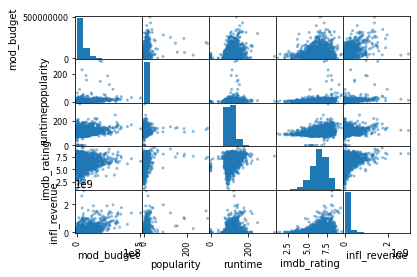

In [91]:
pd.plotting.scatter_matrix(mov_train[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])

In [97]:
corr_matrix1 = mov_train[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']].corr()

In [98]:
print(corr_matrix1)

              mod_budget  popularity   runtime  imdb_rating  infl_revenue
mod_budget      1.000000    0.272392  0.260203     0.004243      0.594614
popularity      0.272392    1.000000  0.133690     0.159394      0.383882
runtime         0.260203    0.133690  1.000000     0.346248      0.254896
imdb_rating     0.004243    0.159394  0.346248     1.000000      0.206060
infl_revenue    0.594614    0.383882  0.254896     0.206060      1.000000


In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mov_train_standard=mov_train.copy()
scaler=StandardScaler()
scaler.fit(mov_train_standard[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])
mov_train_standard[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']]=scaler.transform(mov_train_standard[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])

In [99]:
corr_matrix2 = mov_train_standard[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']].corr()

In [100]:
print(corr_matrix2)

              mod_budget  popularity   runtime  imdb_rating  infl_revenue
mod_budget      1.000000    0.272392  0.260203     0.004243      0.594614
popularity      0.272392    1.000000  0.133690     0.159394      0.383882
runtime         0.260203    0.133690  1.000000     0.346248      0.254896
imdb_rating     0.004243    0.159394  0.346248     1.000000      0.206060
infl_revenue    0.594614    0.383882  0.254896     0.206060      1.000000


In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mov_train_minmax=mov_train.copy()
scaler2=MinMaxScaler()
scaler2.fit(mov_train_minmax[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])
mov_train_minmax[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']]=scaler2.transform(mov_train_minmax[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])

In [104]:
corr_matrix3 = mov_train_minmax[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']].corr()
print(corr_matrix3)

              mod_budget  popularity   runtime  imdb_rating  infl_revenue
mod_budget      1.000000    0.272392  0.260203     0.004243      0.594614
popularity      0.272392    1.000000  0.133690     0.159394      0.383882
runtime         0.260203    0.133690  1.000000     0.346248      0.254896
imdb_rating     0.004243    0.159394  0.346248     1.000000      0.206060
infl_revenue    0.594614    0.383882  0.254896     0.206060      1.000000
